In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

data = pd.read_excel("Book1.xlsx")
data


,review_tag,processed_reviews
0,Good,yeapreordered july got august package wa nice ...
1,Good,got delivered yesterday used hour tell first m...
2,Good,amazing phone
3,Good,brilliant
4,Good,wa skeptically changing one plus word still pr...
...,...,...
9397,Bad,good
9398,Bad,poor
9399,Bad,bed
9400,Bad,average


Epoch 1/10
106/106 [==============================] - 5s 41ms/step - loss: 0.7249 - accuracy: 0.7303 - val_loss: 0.5851 - val_accuracy: 0.7782
Epoch 2/10
106/106 [==============================] - 4s 41ms/step - loss: 0.5043 - accuracy: 0.8190 - val_loss: 0.5729 - val_accuracy: 0.7649
Epoch 3/10
106/106 [==============================] - 5s 43ms/step - loss: 0.4134 - accuracy: 0.8457 - val_loss: 0.6118 - val_accuracy: 0.7649
Epoch 4/10
106/106 [==============================] - 5s 44ms/step - loss: 0.3425 - accuracy: 0.8741 - val_loss: 0.6677 - val_accuracy: 0.7556
Epoch 5/10
106/106 [==============================] - 4s 40ms/step - loss: 0.2736 - accuracy: 0.9087 - val_loss: 0.7124 - val_accuracy: 0.7636
Epoch 6/10
106/106 [==============================] - 4s 41ms/step - loss: 0.2118 - accuracy: 0.9319 - val_loss: 0.7915 - val_accuracy: 0.7503
Epoch 7/10
106/106 [==============================] - 4s 41ms/step - loss: 0.1686 - accuracy: 0.9465 - val_loss: 0.8571 - val_accuracy: 0.7410

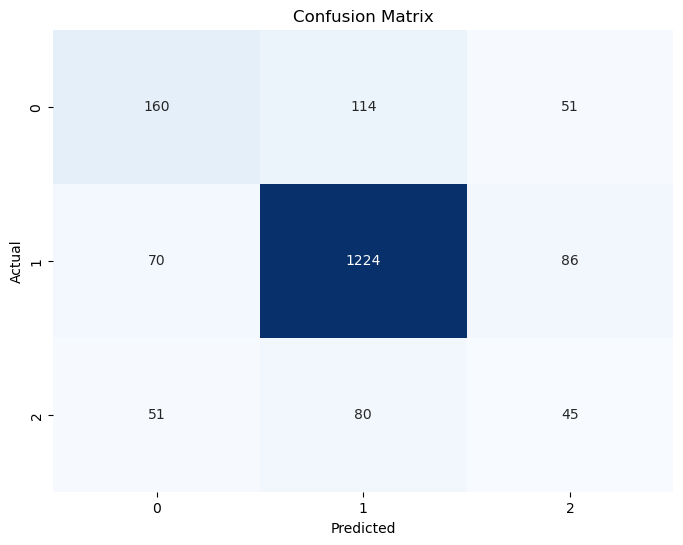

Accuracy: 0.7597022652626038
Classification Report:
               precision    recall  f1-score   support

         Bad       0.57      0.49      0.53       325
        Good       0.86      0.89      0.87      1380
    Moderate       0.25      0.26      0.25       176

    accuracy                           0.76      1881
   macro avg       0.56      0.54      0.55      1881
weighted avg       0.75      0.76      0.76      1881



In [10]:
data = pd.read_excel("Book1.xlsx")
reviews = data["processed_reviews"]
target = data["review_tag"]

label_encoder = LabelEncoder()
target = label_encoder.fit_transform(target)

X_train, X_test, y_train, y_test = train_test_split(reviews, target, test_size=0.2, random_state=42)

max_words = 10000  # Maximum number of words to consider
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 200  # Maximum length of a sequence
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

embedding_dim = 100  # Dimensionality of the word embeddings
num_filters = 128    # Number of filters in the Conv1D layer
filter_size = 5      # Size of the convolutional filters

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length),
    Conv1D(num_filters, filter_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')  
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64
history = model.fit(X_train_padded, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

loss, accuracy = model.evaluate(X_test_padded, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

predictions = model.predict(X_test_padded)
predicted_labels = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, predicted_labels, target_names=label_encoder.classes_)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
